
---

## Dữ liệu

**Nguồn**: Synthetic data generated and inspired from the paper: Length-weight relationships of nine fish species from the Tetulia River, southern Bangladesh: https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data


Chúng ta sẽ sử dụng dataset này xuyên suốt các thảo luận về phương pháp phân loại bằng cây quyết định (Decision Trees, Random Forests, và Gradient Boosted Trees) để so sánh các chỉ số hiệu suất của từng mô hình.

Chúng ta sẽ làm việc với dataset **"Phân loại cá"**, vì nó đơn giản và giúp chúng ta hiểu rõ cách mà các tham số hyperparameter ảnh hưởng đến kết quả phân loại.

<img src="fish.jpg" style="max-width:400px">

Dữ liệu được thu thập từ **các loài cá** và thường được sử dụng trong các bài toán phân loại của học máy để dự đoán loài cá dựa trên chiều dài và trọng lượng của chúng.

### Ngữ cảnh
Mặc dù dataset này không hoàn toàn dựa trên dữ liệu thực tế, việc nghiên cứu về mối quan hệ chiều dài-trọng lượng của các loài cá có thể giúp chúng ta hiểu rõ hơn về sinh thái học và quản lý tài nguyên nước.

### Nội dung
Dataset này bao gồm các mô tả về các loài cá được thu thập từ sông Tetulia, bao gồm các thuộc tính sau:

* **fish_data.csv**: Bao gồm các biến:

    * `species`: Tên loài cá
    * `length`: Chiều dài (cm)
    * `weight`: Trọng lượng (g)
    * `w_l_ratio`: Tỷ lệ trọng lượng / chiều dài
* **fish_data.csv**: Bao gồm các loài cá :
    * `Anabas testudineus`
    * `Coilia dussumieri`
    * `Otolithoides biauritus`
    * `Otolithoides pama`
    * `Pethia conchonius`
    * `Polynemus paradiseus`
    * `Puntius lateristriga`
    * `Setipinna taty`
    * `Sillaginopsis panijus`

**Mục tiêu của chúng ta là tạo ra một mô hình có thể dự đoán loài cá dựa trên chiều dài và trọng lượng của chúng, cũng như tỷ lệ trọng lượng/chiều dài. Điều này có thể hữu ích trong việc nghiên cứu sinh thái và bảo tồn các loài cá tự nhiên.**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

## LỰA CHỌN DATASET

In [8]:
df=pd.read_csv('BIT220059_NGUYEN_MINH_HIEU_data.csv')

In [9]:
# Mô tả dữ liệu
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [10]:
# Kiểm tra giá trị thiếu trong từng cột
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [11]:
# Phân phối dữ liệu nhãn
df['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [12]:
# Phân phối dữ liệu thuộc tính đầu ra
df[['length', 'weight', 'w_l_ratio']].describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


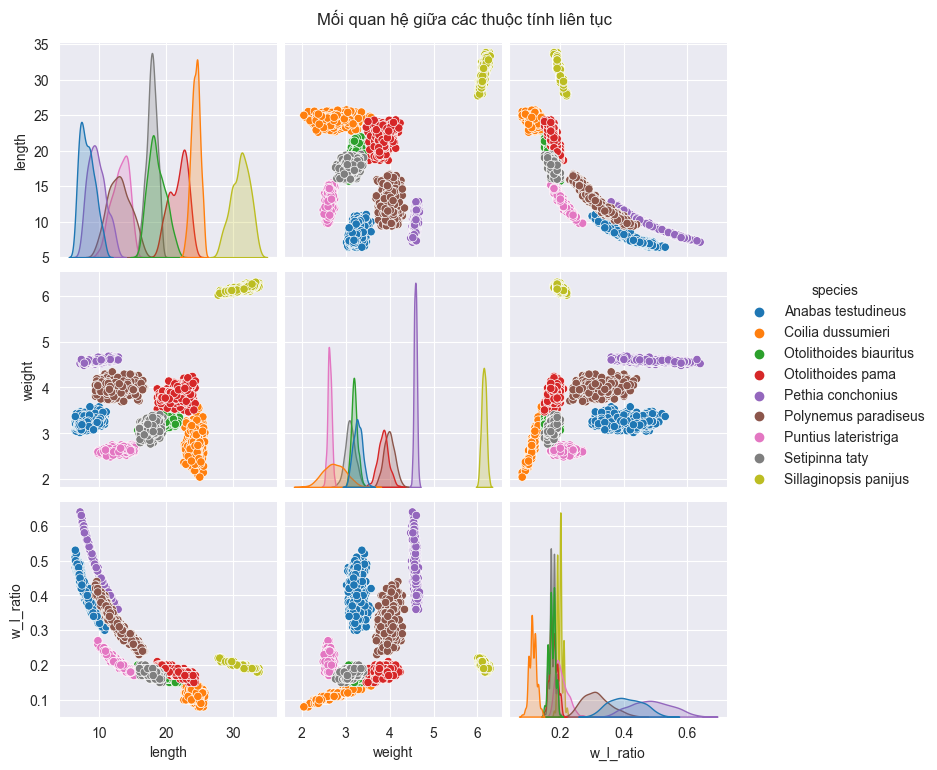

In [698]:
# Vẽ pairplot để kiểm tra mối quan hệ giữa các thuộc tính
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Mối quan hệ giữa các thuộc tính liên tục', y=1.02)
plt.show()

## TIỀN XỬ LÝ DỮ LIỆU

In [13]:
# Lọc các loài cá muốn loại bỏ
species_to_remove = ['Otolithoides biauritus']
df= df[~df['species'].isin(species_to_remove)]

In [14]:
df['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri', 'Otolithoides pama',
       'Pethia conchonius', 'Polynemus paradiseus',
       'Puntius lateristriga', 'Setipinna taty', 'Sillaginopsis panijus'],
      dtype=object)

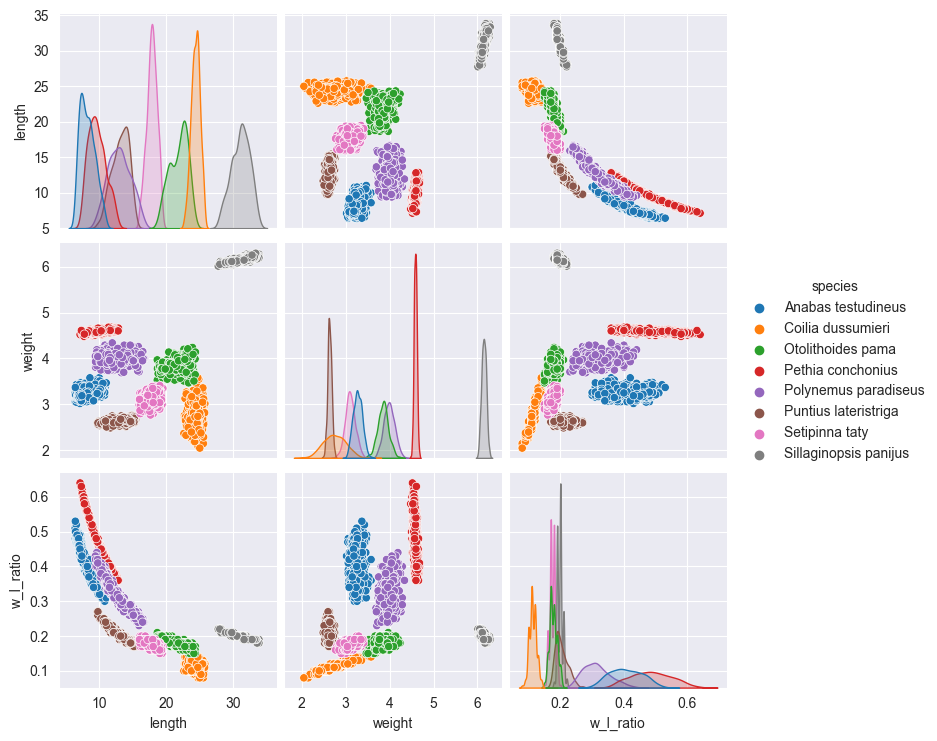

In [701]:
# kiểm tra mối quan hệ liên kết sau khi đã loại bỏ Otolithoides biauritus
sns.pairplot(df,hue='species')

In [15]:
# Mã hóa biến phân loại
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [16]:
df['species_encoded'].value_counts()

species_encoded
6    480
0    476
3    475
4    458
7    455
2    435
5    418
1    415
Name: count, dtype: int64

## train_test_split Dữ liệu

In [17]:
# Chọn các đặc điểm cho việc phân loại
X = df[['length', 'weight', 'w_l_ratio']]
y = df['species_encoded']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [706]:
from imblearn.over_sampling import SMOTE
# Áp dụng SMOTE lên tập huấn luyện để cân bằng các lớp
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## CHỌN RA THAM SỐ TỐT NHẤT

In [707]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [708]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))


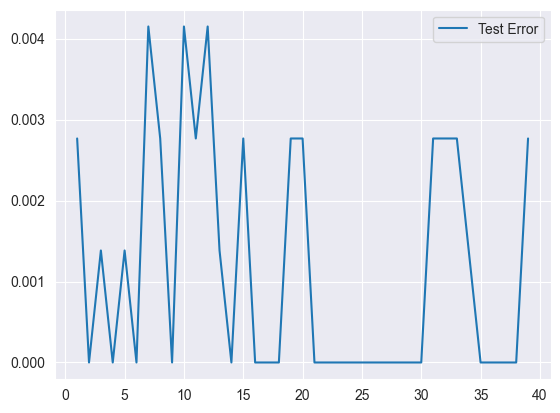

In [709]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [710]:
optimal_n = range(1,40)[test_error.index(min(test_error))]
print(f"Số lượng cây tối ưu: {optimal_n}")

Số lượng cây tối ưu: 2


In [711]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5, None]  # Auto là giá trị mặc định
}
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Huấn luyện mô hình trên tập huấn luyện
grid_search.fit(X_train, y_train)

# Lấy ra bộ tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Đánh giá hiệu suất của mô hình với bộ tham số tốt nhất trên tập kiểm tra
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.2f}")


Best parameters found:  {'max_depth': None, 'max_features': 'auto'}
Test accuracy: 1.00


## HUẤN LUYỆN MÔ HÌNH RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=4,max_features='sqrt', random_state=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=50)

In [20]:
# Dự đoán với tập kiểm tra
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)  # X_test là dữ liệu thử nghiệm

In [21]:
from sklearn.model_selection import cross_val_score

# Thực hiện Cross-Validation
scores = cross_val_score(rf, X, y, cv=5)
# In ra kết quả
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.2f}")

Cross-Validation Scores: [0.99861687 0.99723375 0.99861496 0.99861496 1.        ]
Mean Cross-Validation Score: 1.00


## ĐÁNH GIÁ MÔ HÌNH

In [22]:
from sklearn.metrics import classification_report, accuracy_score
# Đánh giá mô hình
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Test_Accuracy: {accuracy_score(y_test, y_pred):.2f}")

                       precision    recall  f1-score   support

   Anabas testudineus       1.00      1.00      1.00        92
    Coilia dussumieri       1.00      1.00      1.00        74
    Otolithoides pama       1.00      1.00      1.00        93
    Pethia conchonius       1.00      1.00      1.00       103
 Polynemus paradiseus       1.00      1.00      1.00        86
 Puntius lateristriga       1.00      1.00      1.00        86
       Setipinna taty       1.00      1.00      1.00       102
Sillaginopsis panijus       1.00      1.00      1.00        87

             accuracy                           1.00       723
            macro avg       1.00      1.00      1.00       723
         weighted avg       1.00      1.00      1.00       723

Test_Accuracy: 1.00


In [23]:
# Kiểm tra overfitting bằng cách kiểm tra độ chính xác trên tập huấn luyện
y_train_pred = rf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))

Training Accuracy: 1.00
                       precision    recall  f1-score   support

   Anabas testudineus       1.00      1.00      1.00       384
    Coilia dussumieri       1.00      1.00      1.00       341
    Otolithoides pama       1.00      1.00      1.00       342
    Pethia conchonius       1.00      1.00      1.00       372
 Polynemus paradiseus       1.00      1.00      1.00       372
 Puntius lateristriga       1.00      1.00      1.00       332
       Setipinna taty       1.00      1.00      1.00       378
Sillaginopsis panijus       1.00      1.00      1.00       368

             accuracy                           1.00      2889
            macro avg       1.00      1.00      1.00      2889
         weighted avg       1.00      1.00      1.00      2889



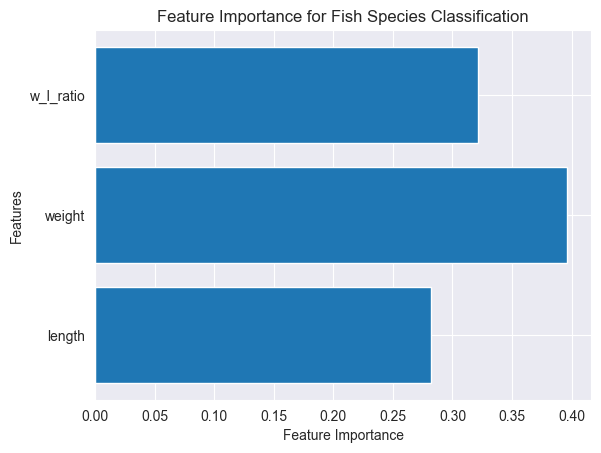

In [24]:
# Vẽ biểu đồ quan trọng của các đặc trưng
importance = rf.feature_importances_
plt.barh(['length', 'weight', 'w_l_ratio'], importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Fish Species Classification')
plt.show()

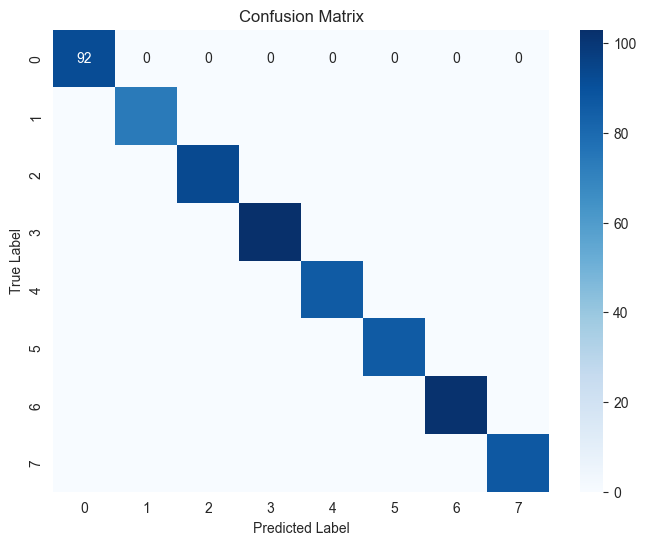

In [25]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

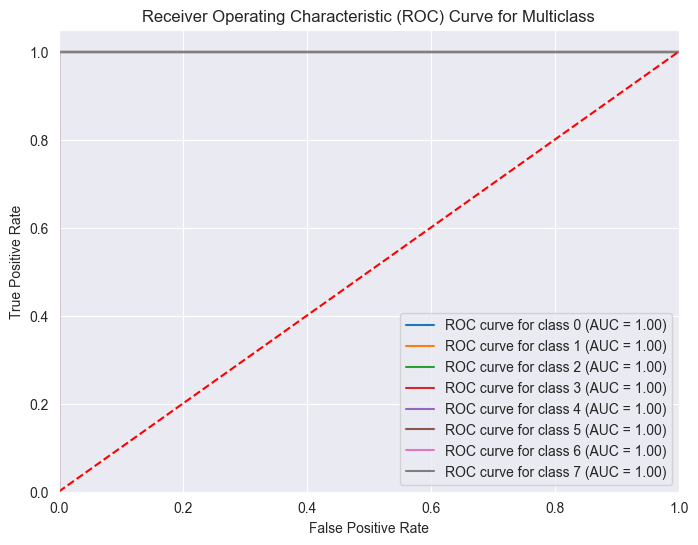

In [26]:
from sklearn.preprocessing import label_binarize
n_classes = len(np.unique(y_test))  # Số lượng lớp
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Tính toán và vẽ ROC cho từng lớp
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label='ROC curve for class {0} (AUC = {1:0.2f})'.format(i, roc_auc))

# Vẽ đường chéo
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

In [720]:
import joblib
# Lưu mô hình
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

## Lấy dữ liệu để tiến hành kiểm tra mô hình

In [34]:
# Lấy ngẫu nhiên 200 mẫu từ X_train và y_train
sample_size = 200
df_sample = df.sample(n=sample_size, random_state=45)

# Lưu mẫu ngẫu nhiên vào tệp CSV
df_sample.to_csv('fish_test_data.csv', index=False)

## Kiểm Tra mô hình

In [35]:
df_test = pd.read_csv('fish_test_data.csv')

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          200 non-null    object 
 1   length           200 non-null    float64
 2   weight           200 non-null    float64
 3   w_l_ratio        200 non-null    float64
 4   species_encoded  200 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [37]:
from sklearn.preprocessing import LabelEncoder
le_test = LabelEncoder()
df_test['species_encoded'] = le.fit_transform(df_test['species'])

In [38]:
# Chọn các đặc điểm cho việc phân loại
X_new= df_test[['length', 'weight', 'w_l_ratio']]
y_new = df_test['species_encoded']

In [39]:
import joblib
# Tải mô hình đã lưu
rf_loaded = joblib.load('random_forest_model.pkl')

In [40]:
# Dự đoán với mô hình đã tải
y_pred_new = rf_loaded.predict(X_new)

# Đánh giá kết quả (nếu có nhãn thực tế)
print(classification_report(y_new, y_pred_new, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_new, y_pred_new):.2f}")

                       precision    recall  f1-score   support

   Anabas testudineus       1.00      1.00      1.00        25
    Coilia dussumieri       1.00      1.00      1.00        14
    Otolithoides pama       1.00      1.00      1.00        23
    Pethia conchonius       1.00      1.00      1.00        34
 Polynemus paradiseus       1.00      1.00      1.00        28
 Puntius lateristriga       1.00      1.00      1.00        17
       Setipinna taty       1.00      1.00      1.00        34
Sillaginopsis panijus       1.00      1.00      1.00        25

             accuracy                           1.00       200
            macro avg       1.00      1.00      1.00       200
         weighted avg       1.00      1.00      1.00       200

Accuracy: 1.00


In [41]:
from sklearn.model_selection import cross_val_score
# Thực hiện Cross-Validation
scores = cross_val_score(rf, X_new, y_new, cv=5)
# In ra kết quả
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.2f}")

Cross-Validation Scores: [0.975 0.975 1.    0.95  0.975]
Mean Cross-Validation Score: 0.97


In [51]:
df_test.head()

,species,length,weight,w_l_ratio,species_encoded
0,Pethia conchonius,10.14,4.63,0.46,3
1,Anabas testudineus,6.90,3.18,0.46,0
2,Setipinna taty,18.74,3.05,0.16,6
3,Puntius lateristriga,14.19,2.66,0.19,5
4,Anabas testudineus,7.19,3.20,0.44,0


In [52]:
new_data = pd.DataFrame({'length': [11], 'weight': [5], 'w_l_ratio': [0.52]})
prediction = rf_loaded.predict(new_data)
print(f'Predicted species: {prediction[0]}')

Predicted species: 3
